## Multiple Regression
Date: 09/12/2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sat.csv')
df.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643.0,589.0,3.76,3.52
1,2.78,558.0,512.0,2.87,2.91
2,2.52,583.0,503.0,2.54,2.40
3,3.67,685.0,602.0,3.83,3.47
4,3.24,592.0,538.0,3.29,3.47


In [3]:
df.isnull().sum()

high_GPA    1
math_SAT    2
verb_SAT    1
comp_GPA    2
univ_GPA    0
dtype: int64

In [4]:
df.describe()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
count,104.000000,103.000000,104.000000,103.000000,105.000000
mean,3.067500,622.058252,598.846154,3.125922,3.172857
std,0.510982,53.667061,63.217727,0.513751,0.447194
min,2.030000,516.000000,480.000000,2.030000,2.080000
25%,2.667500,572.000000,546.750000,2.865000,3.010000
50%,3.160000,609.000000,591.500000,3.210000,3.290000
75%,3.480000,674.000000,645.750000,3.500000,3.470000
max,3.940000,718.000000,732.000000,4.000000,3.810000


In [5]:
df['high_GPA']=df['high_GPA'].fillna(df['high_GPA'].mean(), axis=0)

In [6]:
df['math_SAT']=df['math_SAT'].fillna(df['math_SAT'].mean(), axis=0)
df['verb_SAT']=df['verb_SAT'].fillna(df['verb_SAT'].mean(), axis=0)
df['comp_GPA']=df['comp_GPA'].fillna(df['comp_GPA'].mean(), axis=0)

In [7]:
df.isnull().sum()

high_GPA    0
math_SAT    0
verb_SAT    0
comp_GPA    0
univ_GPA    0
dtype: int64

In [8]:
# Separate the features and target
target = df.iloc[:, -1]
predictors = df.drop(['univ_GPA'], axis=1)

predictors.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA
0,3.45,643.0,589.0,3.76
1,2.78,558.0,512.0,2.87
2,2.52,583.0,503.0,2.54
3,3.67,685.0,602.0,3.83
4,3.24,592.0,538.0,3.29


In [9]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

In [10]:
numeric_features(predictors)

Index(['high_GPA', 'math_SAT', 'verb_SAT', 'comp_GPA'], dtype='object')

In [13]:
# Function to plot histograms

def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range (0, len(numeric_columns), 2):
        if(len(numeric_columns) > i+1):
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde = True)
            plt.subplot(122)
            sns.distplot(dataframe[numeric_columns[i+1]], kde = True)
            plt.tight_layout()
            plt.show()
        else:
            sns.distplot(dataframe[numeric_columns[i]], kde = False)
            
def plot_box_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range (0, len(numeric_columns), 2):
        if(len(numeric_columns) > i+1):
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()
        else:
            sns.boxplot(dataframe[numeric_columns[i]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


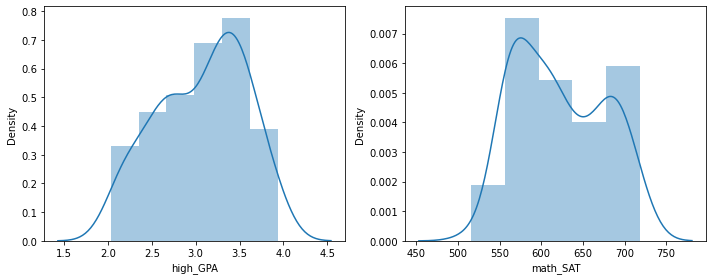

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


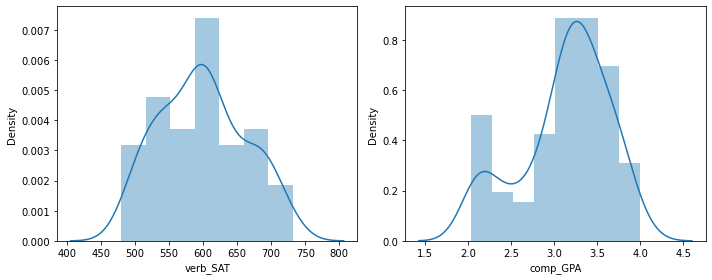

In [14]:
plot_continuous_columns(predictors)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


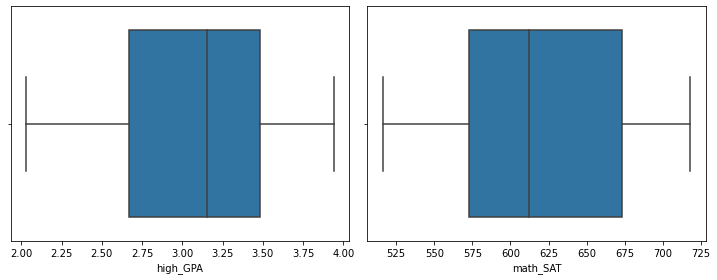

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


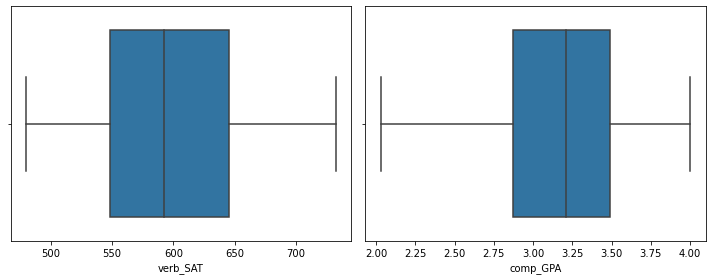

In [16]:
plot_box_columns(predictors)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalerMinMax = MinMaxScaler()
predictors = scalerMinMax.fit_transform(predictors)

In [18]:
predictors = pd.DataFrame(predictors)
predictors.head()

,0,1,2,3
0,0.743455,0.628713,0.432540,0.878173
1,0.392670,0.207921,0.126984,0.426396
2,0.256545,0.331683,0.091270,0.258883
3,0.858639,0.836634,0.484127,0.913706
4,0.633508,0.376238,0.230159,0.639594


In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(predictors, target, test_size =0.3, random_state=6)

In [20]:
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [21]:
reg.coef_

array([ 0.14984995, -0.06965184,  0.13518894,  1.54805324])

In [22]:
reg.intercept_

2.1971180694589254

In [23]:
y_pred = reg.predict(xtest)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mse = mean_squared_error(ytest, y_pred)
print('Mean Squared Error: ', mse)
r2 = r2_score(ytest, y_pred)
print('R-squared Error: ', r2)

Mean Squared Error:  0.028610442749956472
R-squared Error:  0.8315754695747668


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='univ_GPA', ylabel='Density'>

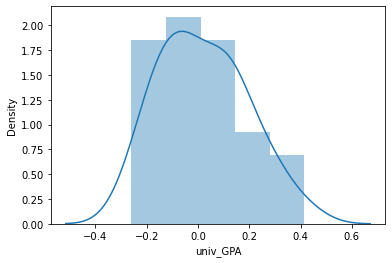

In [27]:
residual = ytest - y_pred
sns.distplot(residual)

In [28]:
from sklearn.linear_model import Ridge

In [29]:
ridge = Ridge()

# fit and predict
ridge.fit(xtrain, ytrain)
ridge_pred = ridge.predict(xtest)

# Calculate RMSE
ridge_rmse = np.sqrt(mean_squared_error(ytest, ridge_pred))
ridge_r2 = r2_score(ytest, ridge_pred)
print('Ridge Mean squared Error: ',ridge_rmse)
print('Ridge R-squared Error: ',ridge_r2)

Ridge Mean squared Error:  0.16480821486698882
Ridge R-squared Error:  0.840103676835725
